In [1]:
# --- 1. Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

In [53]:
# --- 2. Load cleaned dataset
df_original = pd.read_csv("../../data/clean/news_clean/filtered_news_dataset.csv", parse_dates=["pubtime"])
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242643 entries, 0 to 242642
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   pubtime        242643 non-null  datetime64[ns, UTC]
 1   language       242643 non-null  object             
 2   char_count     242643 non-null  float64            
 3   medium_name    242643 non-null  object             
 4   head_clean     242643 non-null  object             
 5   content_clean  242643 non-null  object             
 6   source_file    242643 non-null  object             
 7   company        242643 non-null  object             
 8   year           242643 non-null  int64              
 9   month          242643 non-null  int64              
 10  year_month     242643 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(7)
memory usage: 20.4+ MB


In [79]:
df = df_original.copy()

In [58]:
df.head()

,pubtime,language,char_count,medium_name,head_clean,content_clean,source_file,company,year,month,year_month
0,2022-02-01 05:30:02+00:00,de,4542.0,cash.ch,4-Wochenvorschau Schweiz,Nachfolgend die wichtigsten Wirtschafts- und F...,abb.csv,ABB,2022,2,2022-02
1,2024-02-23 11:49:11+00:00,de,4232.0,cash.ch,Rosengren nimmt bei ABB den Hut und übergibt a...,Chefwechsel bei ABB: Nach vier Jahren an der S...,abb.csv,ABB,2024,2,2024-02
2,2022-09-30 06:37:00+00:00,de,1532.0,cash.ch,ABB trennt sich von restlichem Stromnetz-Geschäft,Der Elektrotechnikkonzern ABB verkauft die ver...,abb.csv,ABB,2022,9,2022-09
3,2019-07-01 11:38:19+00:00,de,4461.0,handelszeitung.ch,Schweizer Konzerne warten im EU-Börsenstreit e...,Die SMI-Unternehmen lassen sich durch das Ende...,abb.csv,ABB,2019,7,2019-07
4,2020-06-15 15:18:00+00:00,de,25171.0,cash.ch,+++Börsen-Ticker+++ - US-Börsen notieren deutl...,"16:50 Im Dow-Jones-Index , der 1,6 Prozent im ...",abb.csv,ABB,2020,6,2020-06


In [ ]:
# --- Filter: keep only articles that mention their own company,
#             and only if the article mentions exactly ONE company ---

import re
try:
    from unidecode import unidecode
except Exception:
    import sys, subprocess
    subprocess.run([sys.executable, "-m", "pip", "install", "unidecode"], check=True)
    from unidecode import unidecode


def normalize_txt(x: str) -> str:
    """Lowercase, remove accents, normalize spaces."""
    x = unidecode(str(x)).lower()
    x = re.sub(r"\s+", " ", x).strip()
    return x


# ---- alias map for your companies ----
# Note: Case does not matter; we normalize everything.
alias_map = {
    "ABB": [
        "ABB", "ABB LTD", "ABB GROUP",
        "ABB AG", "ABB KONZERN", "ABB SCHWEIZ"
    ],
    "Alcon": [
        "ALCON", "ALCON AG",
        "ALCON UNTERNEHMEN"
    ],
    "Alpine": ["ALPINE"],
    "Aryzta": ["ARYZTA", "ARYZTA AG"],
    "Baloise": [
        "BALOISE", "BALOISE GROUP",
        "BALOISE VERSICHERUNG", "BALOISE HOLDING", "BALOISE GRUPPE"
    ],
    "BKW Energie": [
        "BKW", "BKW ENERGIE",
        "BKW AG", "BKW GRUPPE"
    ],
    "BLKB": [
        "BLKB", "BASELLANDSCHAFTLICHE KANTONALBANK",
        "BLKB AG"
    ],
    "Emmi": [
        "EMMI", "EMMI AG",
        "EMMI GRUPPE", "EMMI GRUPPE AG"
    ],
    "Givaudan": [
        "GIVAUDAN", "GIVAUDAN SA",
        "GIVAUDAN GRUPPE"
    ],
    "Helvetia": [
        "HELVETIA", "HELVETIA INSURANCE",
        "HELVETIA VERSICHERUNG", "HELVETIA GRUPPE"
    ],
    "Holcim": [
        "HOLCIM", "HOLCIM GROUP",
        "HOLCIM AG", "HOLCIM GRUPPE"
    ],
    "Julius Baer": [
        "JULIUS BAER", "JULIUS BÄR", "JULIUS BAR",
        "BANK JULIUS BAER", "BANK JULIUS BÄR",
        "JULIUS BAER GRUPPE", "JULIUS BÄR GRUPPE"
    ],
    "Swiss Life": [
        "SWISS LIFE", "SWISSLIFE", "SWISS LIFE AG",
        "SWISS LIFE GROUPE", "SWISSLIFE GROUPE",
        "SWISSLIFE GROUP", "SWISS LIFE GROUP",
        "VIE SUISSE", "LA VIE SUISSE",
        "SCHWEIZER LEBEN", "SCHWEIZER LEBENSVERSICHERUNG", "SWISS LIFE VERSICHERUNG"
    ],
    "Swiss Re": [
        "SWISS RE", "SWISSRE", "SWISS RE AG", "SWISS RE GROUPE", "SWISSRE GROUPE",
        "SWISSRE GROUP", "SWISS RE GROUP", "RE SUISSE", "LA RE SUISSE",
        "REASSUREUR SUISSE", "SWISS REINSURANCE",
        "SCHWEIZER RÜCK", "SCHWEIZER RÜCKVERSICHERUNG", "SWISS RÜCKVERSICHERUNG"
    ],
    "Nestle": [
        "NESTLE", "NESTLÉ", "NESTLE SA", "NESTLÉ SA",
        "NESTLE GROUP", "NESTLÉ GROUP",
        "NESTLE GROUPE", "NESTLÉ GROUPE",
        "GROUPE NESTLE", "GROUPE NESTLÉ",
        "NESTLE KONZERN", "NESTLÉ KONZERN", "NESTLE SCHWEIZ", "NESTLÉ SCHWEIZ"
    ],
    "Landis": [
        "LANDIS", "LANDIS GYR", "LANDIS+GYR",
        "LANDIS & GYR", "LANDIS UND GYR"
    ],
    "Logitech": ["LOGITECH", "LOGITECH INTERNATIONAL", "LOGITECH AG"],
    "Lonza": ["LONZA", "LONZA GROUP", "LONZA AG", "LONZA GRUPPE"],
    "Novartis": ["NOVARTIS", "NOVARTIS AG", "NOVARTIS GRUPPE"],
    "Reishauer": ["REISHAUER"],
    "Richemont": [
        "RICHEMONT", "COMPAGNIE FINANCIERE RICHEMONT",
        "RICHEMONT AG", "RICHEMONT GRUPPE"
    ],
    "Roche": [
        "ROCHE", "F HOFFMANN LA ROCHE", "ROCHE HOLDING",
        "ROCHE AG", "ROCHE GRUPPE", "F. HOFFMANN-LA ROCHE"
    ],
    "Santhera": ["SANTHERA", "SANTHERA PHARMACEUTICALS", "SANTHERA AG"],
    "Swatch": ["SWATCH", "SWATCH GROUP", "SWATCH GRUPPE"],
    "Swisscom": ["SWISSCOM", "SWISS COM", "SWISSCOM AG"],
    "Swissquote": ["SWISSQUOTE"],
    "Swiss Prime Site": ["SWISS PRIME SITE", "SPS", "SWISS PRIME SITE AG"],
    "UBS": ["UBS", "UBS GROUP", "UBS AG", "UBS SCHWEIZ"],
    "Vontobel": ["VONTOBEL", "BANK VONTOBEL", "VONTOBEL AG", "VONTOBEL GRUPPE"],
    "Zurich Insurance": [
        "ZURICH INSURANCE", "ZURICH INSURANCE GROUP", "ZURICH",
        "ZURICH GRUPPE", "ZURICH VERSICHERUNG", "ZURICH VERSICHERUNG AG", "ZURICH AG"
    ],
    "Schweizer Versicherung": ["SCHWEIZER VERSICHERUNG"],
}

# Normalize aliases (accents/spaces) and compile regex patterns per company
for k, v in alias_map.items():
    alias_map[k] = [normalize_txt(a) for a in v]

compiled = {}
for comp, aliases in alias_map.items():
    escaped = [re.escape(a) for a in aliases]
    # Whole-word style match to avoid partials (e.g., "ABBott")
    pat = r"(?<!\w)(?:%s)(?!\w)" % "|".join(escaped)
    compiled[normalize_txt(comp)] = re.compile(pat, flags=re.IGNORECASE)

compiled_items = list(compiled.items())  # for iteration speed

# --- Normalize text once
if "text_norm" not in df.columns:
    df["text_norm"] = (df["head_clean"].fillna("") + " " + df["content_clean"].fillna("")).apply(normalize_txt)
if "company_norm" not in df.columns:
    df["company_norm"] = df["company"].apply(normalize_txt)

# --- Helper: which companies appear in an article?
def find_matched_companies(text_norm: str):
    hits = []
    for comp_key, pat in compiled_items:
        if pat.search(text_norm):
            hits.append(comp_key)
            # micro-optimization: stop early once we know it's multi-company
            if len(hits) > 1:
                break
    return set(hits)

df["matched_companies"] = df["text_norm"].apply(find_matched_companies)
df["n_companies"] = df["matched_companies"].apply(len)

def the_only_company(s):
    return next(iter(s)) if len(s) == 1 else None

df["only_company_norm"] = df["matched_companies"].apply(the_only_company)

# --- Keep only rows where:
#     (a) The article mentions exactly ONE company, and
#     (b) That company equals the row's company.
single_company_mask = (df["n_companies"] == 1) & (df["company_norm"] == df["only_company_norm"])
kept_single = df[single_company_mask].copy()

print(
    f"Kept {len(kept_single):,} single-company articles; "
    f"dropped {len(df) - len(kept_single):,} multi-company or unmatched."
)




Kept 135,435 single-company articles; dropped 107,208 multi-company or unmatched.


,pubtime,language,char_count,medium_name,head_clean,content_clean,source_file,company,year,month,year_month,text_norm,company_norm
1,2024-02-23 11:49:11+00:00,de,4232.0,cash.ch,Rosengren nimmt bei ABB den Hut und übergibt a...,Chefwechsel bei ABB: Nach vier Jahren an der S...,abb.csv,ABB,2024,2,2024-02,rosengren nimmt bei abb den hut und ubergibt a...,abb
2,2022-09-30 06:37:00+00:00,de,1532.0,cash.ch,ABB trennt sich von restlichem Stromnetz-Geschäft,Der Elektrotechnikkonzern ABB verkauft die ver...,abb.csv,ABB,2022,9,2022-09,abb trennt sich von restlichem stromnetz-gesch...,abb
6,2023-05-19 22:00:00+00:00,de,4457.0,Aargauer Zeitung / MLZ,Fitness-Pionier übergibt an Sohn,Im April 1989 eröffnete Armin Vock das Fitness...,abb.csv,ABB,2023,5,2023-05,fitness-pionier ubergibt an sohn im april 1989...,abb
10,2024-03-27 23:00:00+00:00,de,2984.0,Aargauer Zeitung / MLZ,Eine Kita in der eigenen Firma,Die Dottiker Schäfer Holzbautechnik gründet ei...,abb.csv,ABB,2024,3,2024-03,eine kita in der eigenen firma die dottiker sc...,abb
14,2021-07-02 03:30:00+00:00,de,8120.0,nzz.ch,Das neue Highlight in der Startup-Szene: Die S...,Die Software von drei Münchner Gründern durchl...,abb.csv,ABB,2021,7,2021-07,das neue highlight in der startup-szene: die s...,abb


In [83]:
# --- Finalize: drop helper cols (keep text_norm if you need it for later models)
df_single_company = kept_single.drop(columns=["matched_companies", "n_companies", "only_company_norm"])
# df_single_company = df_single_company.drop(columns=["text_norm", "company_norm"])  # uncomment if you don't need them later

df_single_company.head()

,pubtime,language,char_count,medium_name,head_clean,content_clean,source_file,company,year,month,year_month,text_norm,company_norm
1,2024-02-23 11:49:11+00:00,de,4232.0,cash.ch,Rosengren nimmt bei ABB den Hut und übergibt a...,Chefwechsel bei ABB: Nach vier Jahren an der S...,abb.csv,ABB,2024,2,2024-02,rosengren nimmt bei abb den hut und ubergibt a...,abb
2,2022-09-30 06:37:00+00:00,de,1532.0,cash.ch,ABB trennt sich von restlichem Stromnetz-Geschäft,Der Elektrotechnikkonzern ABB verkauft die ver...,abb.csv,ABB,2022,9,2022-09,abb trennt sich von restlichem stromnetz-gesch...,abb
6,2023-05-19 22:00:00+00:00,de,4457.0,Aargauer Zeitung / MLZ,Fitness-Pionier übergibt an Sohn,Im April 1989 eröffnete Armin Vock das Fitness...,abb.csv,ABB,2023,5,2023-05,fitness-pionier ubergibt an sohn im april 1989...,abb
10,2024-03-27 23:00:00+00:00,de,2984.0,Aargauer Zeitung / MLZ,Eine Kita in der eigenen Firma,Die Dottiker Schäfer Holzbautechnik gründet ei...,abb.csv,ABB,2024,3,2024-03,eine kita in der eigenen firma die dottiker sc...,abb
14,2021-07-02 03:30:00+00:00,de,8120.0,nzz.ch,Das neue Highlight in der Startup-Szene: Die S...,Die Software von drei Münchner Gründern durchl...,abb.csv,ABB,2021,7,2021-07,das neue highlight in der startup-szene: die s...,abb


In [84]:
df_single_company.shape

(135435, 13)

In [85]:
df_single_company.to_csv("../../data/clean/news_clean/filtered_news_dataset_single_company.csv", index=False)

In [80]:
multi_or_unmatched = kept_single.reindex(df.index.difference(kept_single.index))
# or simply before the final assignment:
multi_or_unmatched = df[~single_company_mask].copy()


In [82]:
multi_or_unmatched.to_csv("../../data/clean/news_clean/multi_or_unmatched_news_dataset.csv", index=False)

In [86]:
multi_or_unmatched.shape

(107208, 11)

In [88]:
df= df_single_company.copy()

In [89]:
# --- 3. Basic sanity checks
print("Articles:", len(df))
print("Companies:", df['company'].nunique())
print("Media outlets:", df['medium_name'].nunique())
print("Languages:", df['language'].value_counts(normalize=True).round(3))

Articles: 135435
Companies: 30
Media outlets: 154
Languages: language
de    0.817
fr    0.171
it    0.008
en    0.004
Name: proportion, dtype: float64


## 1. Company Coverage
### Which companies dominate the dataset?

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3687538035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=companies.values, y=companies.index, palette="Blues_r")


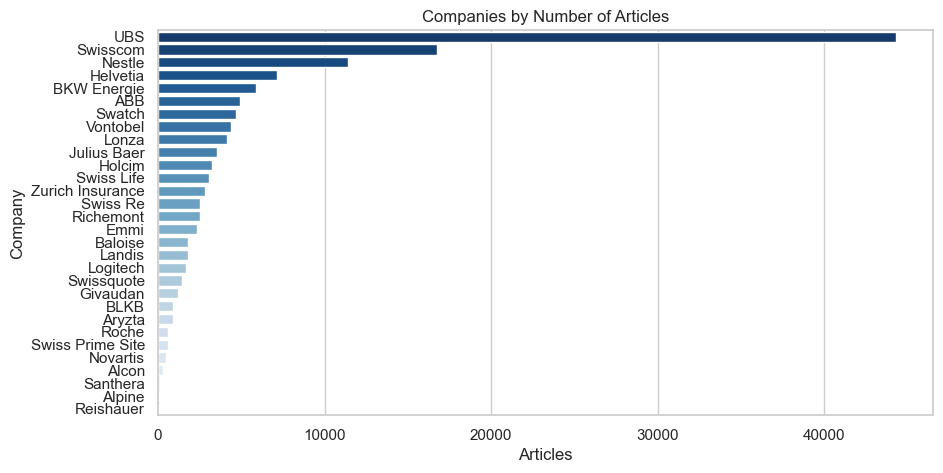

In [90]:
companies = df['company'].value_counts()
sns.barplot(x=companies.values, y=companies.index, palette="Blues_r")
plt.title("Companies by Number of Articles")
plt.xlabel("Articles")
plt.ylabel("Company")
plt.savefig("../../figures/news_exploration/companies_by_articles.png")
plt.show()

## 2. Source / Medium Coverage 
### Which outlets dominate?

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\2595291087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_media.values, y=top_media.index, palette="Greens_r")


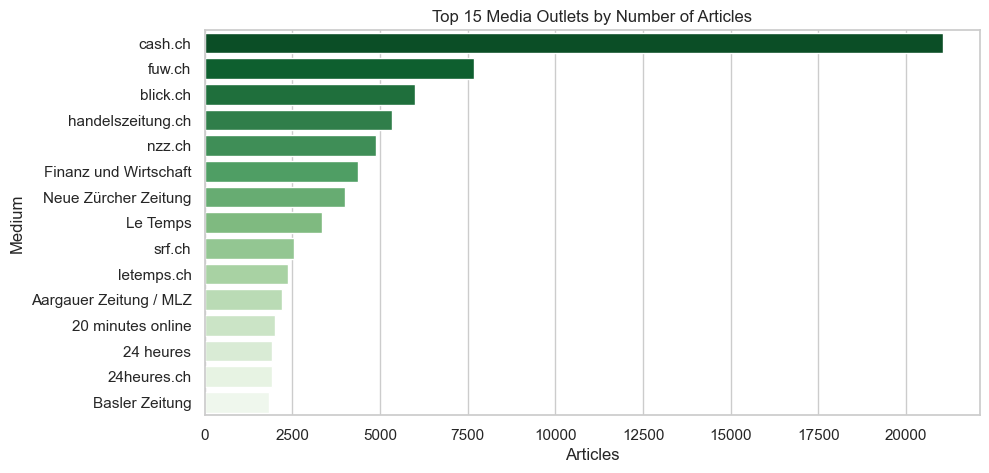

In [91]:
top_media = df['medium_name'].value_counts().head(15)
sns.barplot(x=top_media.values, y=top_media.index, palette="Greens_r")
plt.title("Top 15 Media Outlets by Number of Articles")
plt.xlabel("Articles")
plt.ylabel("Medium")
plt.savefig("../../figures/news_exploration/top_media_by_articles.png")
plt.show()


## 3. Temporal Coverage

### How are articles distributed over time?

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\2551564760.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['pubtime'].dt.to_period('M')


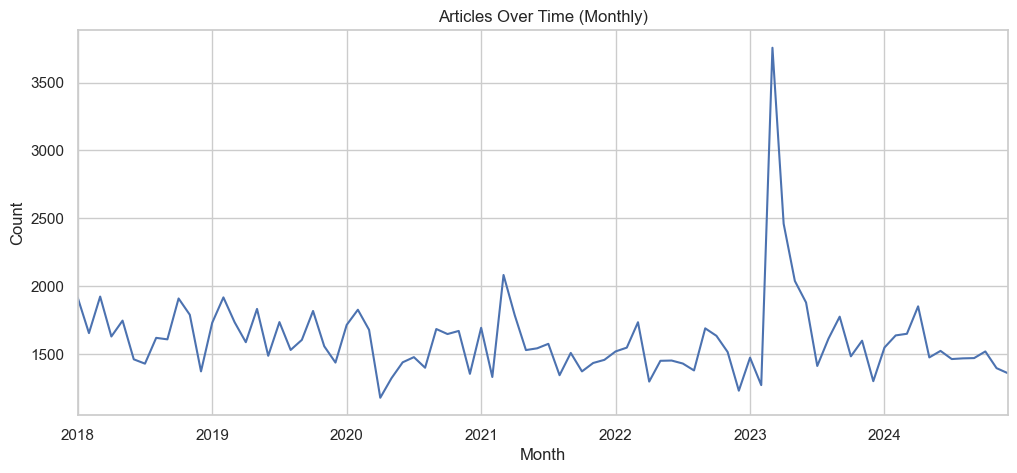

In [92]:
df['year_month'] = df['pubtime'].dt.to_period('M')
monthly_counts = df.groupby('year_month').size()
monthly_counts.plot(kind='line', figsize=(12,5))
plt.title("Articles Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.savefig("../../figures/news_exploration/articles_over_time.png")
plt.show()


## 4. Text Length Distribution

### Are there consistent article sizes?

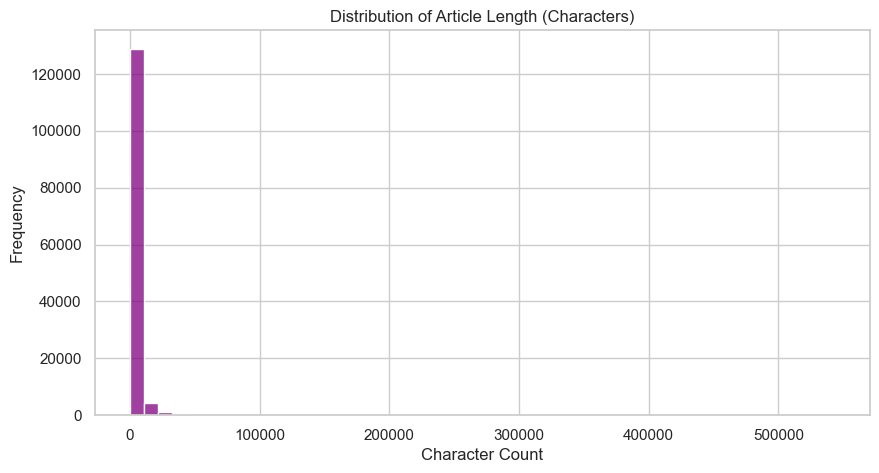

In [93]:
sns.histplot(df['char_count'], bins=50, color='purple')
plt.title("Distribution of Article Length (Characters)")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.savefig("../../figures/news_exploration/article_length_distribution.png")
plt.show()


## 5. Sample Inspection

### Check data quality manually

In [94]:
df.sample(5)[['company', 'medium_name', 'pubtime', 'head_clean', 'content_clean']]


,company,medium_name,pubtime,head_clean,content_clean
179210,UBS,20 minuten,2019-05-16 22:00:00+00:00,UBS kommt ohne Busse davon,BRÜSSEL. Die Wettbewerbshüter der Europäischen...
152716,Swisscom,tdg.ch,2021-02-04 06:44:27+00:00,Télécommunications: Swisscom accuse un repli d...,Swisscom entend proposer à ses actionnaires le...
214620,UBS,nzz.ch,2018-03-05 13:00:30+00:00,Wie Superreiche ihr Mobiltelefon für die Gelda...,cts.\n\nÜber Jahrzehnte war das Erfolgsgeheimn...
33123,Baloise,Solothurner Zeitung / MLZ,2018-06-06 22:00:00+00:00,Die Versicherer mögen Fussball nicht,Unfälle Fussballvereine finden nur schwer eine...
109708,Nestle,cash.ch,2020-04-23 12:00:02+00:00,Ausblick Nestlé: Organisches Wachstum im Q1 vo...,Der Lebensmittelkonzern Nestlé publiziert am F...


## 6. Language Distribution by Company


<Figure size 1000x1200 with 0 Axes>

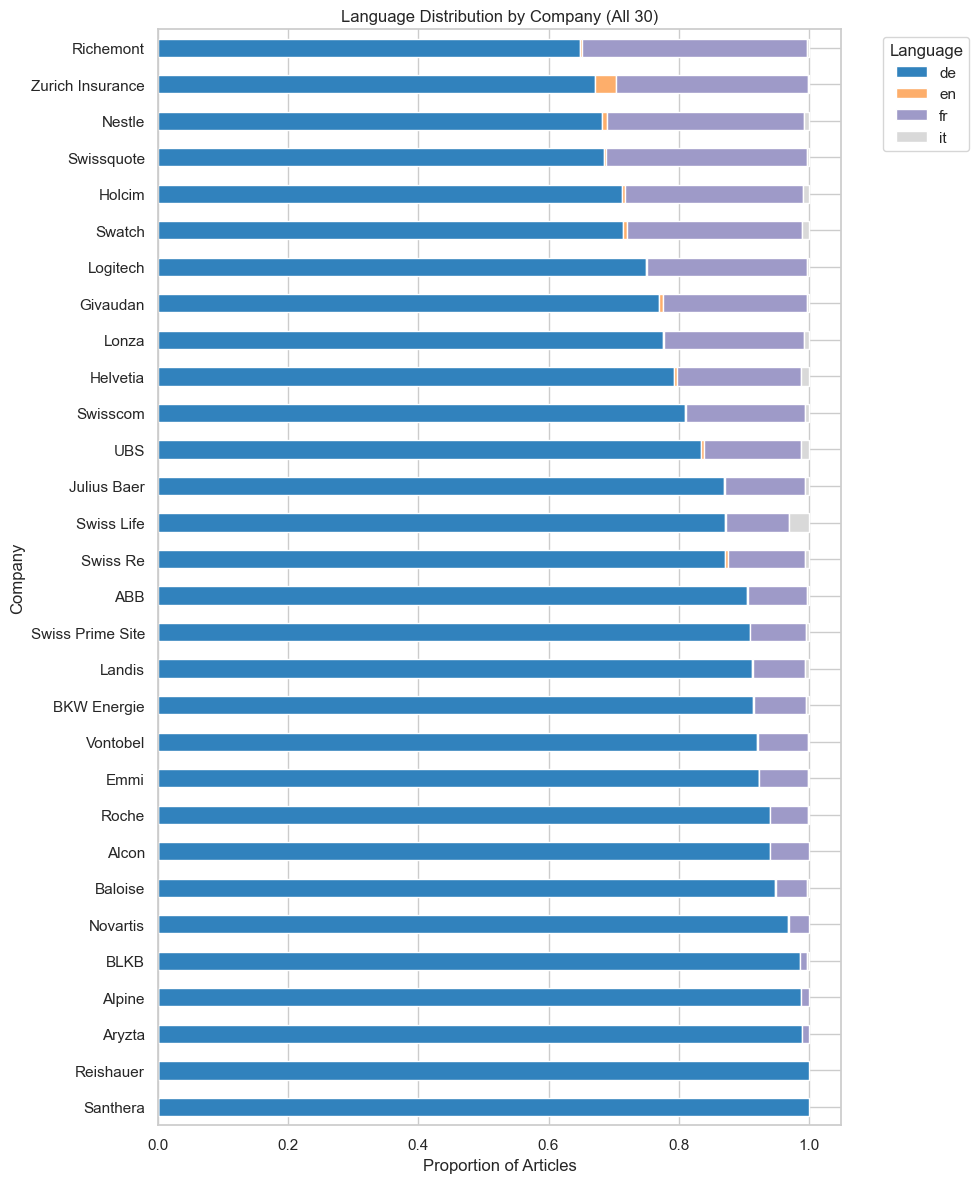

In [95]:
# 1. Aggregate language counts per company
lang_by_company = (
    df.groupby(["company", "language"])
      .size()
      .reset_index(name="count")
)

# 2. Normalize to get proportions (within each company)
lang_by_company["proportion"] = (
    lang_by_company.groupby("company")["count"]
                   .transform(lambda x: x / x.sum())
)

# 3. Pivot to a matrix (companies x languages)
lang_matrix = lang_by_company.pivot(
    index="company", columns="language", values="proportion"
).fillna(0)

# 4. Sort by German proportion (for clearer visualization)
lang_matrix = lang_matrix.sort_values(by="de", ascending=False)

# 5. Plot as a stacked horizontal bar chart
plt.figure(figsize=(10, 12))
lang_matrix.plot(kind="barh", stacked=True, colormap="tab20c", figsize=(10, 12))
plt.title("Language Distribution by Company (All 30)")
plt.xlabel("Proportion of Articles")
plt.ylabel("Company")
plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../../figures/news_exploration/language_distribution_by_company.png")
plt.show()


## 7. Language Frequency Over Time by Company
### How frequently do different languages appear over time for each company?

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3311935609.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


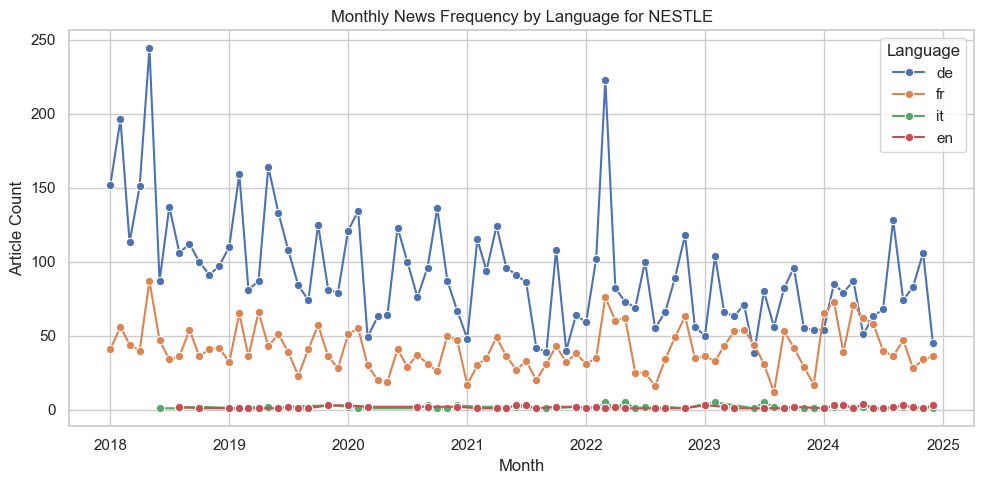

In [96]:
# Choose one company to inspect (e.g. Nestlé)
company_name = "Nestle"

# Filter for that company
subset = df[df['company'] == company_name].copy()

# Convert pubtime to monthly period
subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()

# Group by month and language
monthly_lang = subset.groupby(['month', 'language']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_lang, x='month', y='count', hue='language', marker='o')
plt.title(f"Monthly News Frequency by Language for {company_name.upper()}")
plt.xlabel("Month")
plt.ylabel("Article Count")
plt.legend(title="Language")
plt.tight_layout()
plt.savefig("../../figures/news_exploration/monthly_news_frequency_by_language.png")
plt.show()


C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


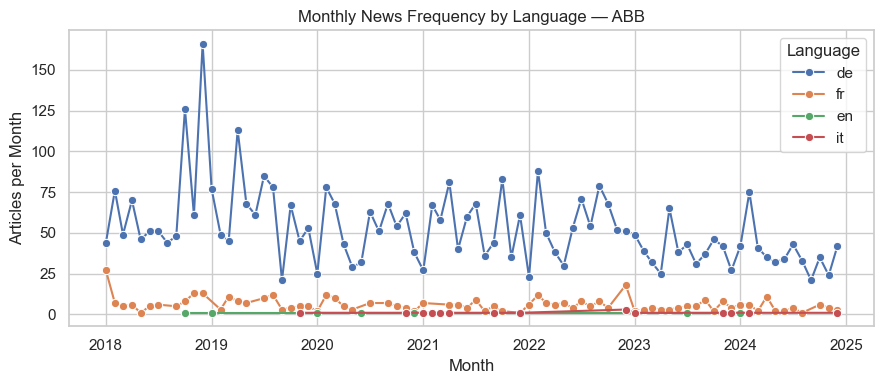

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


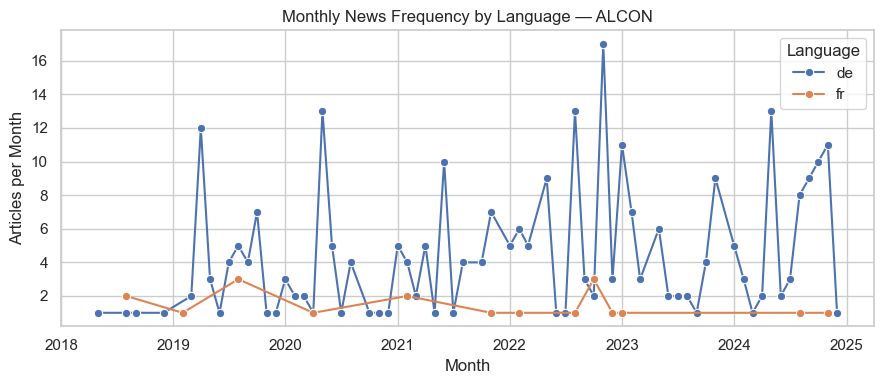

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


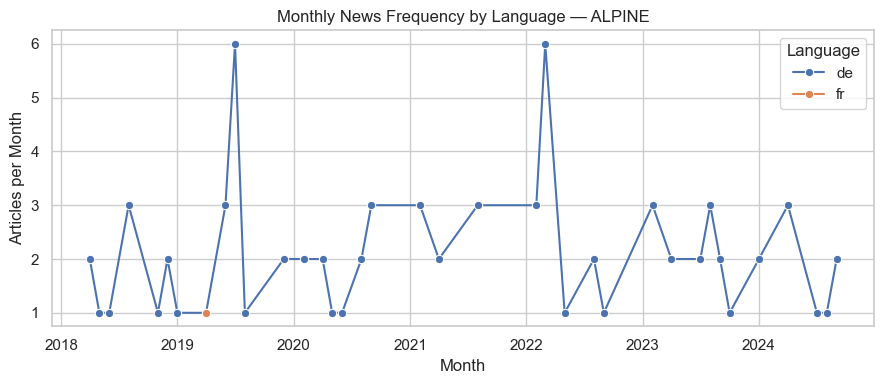

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


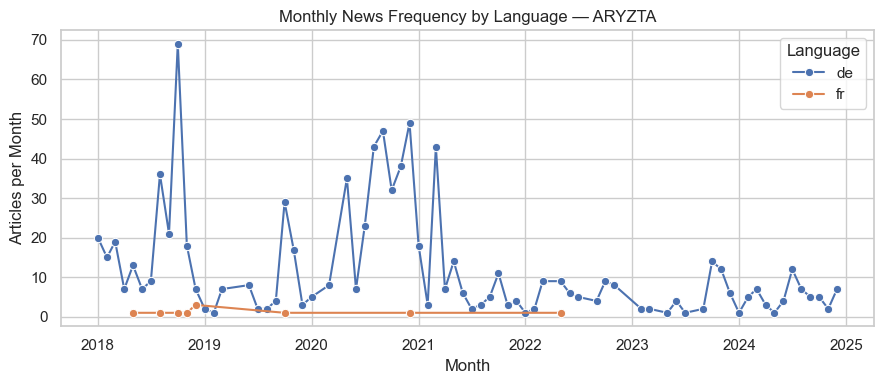

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


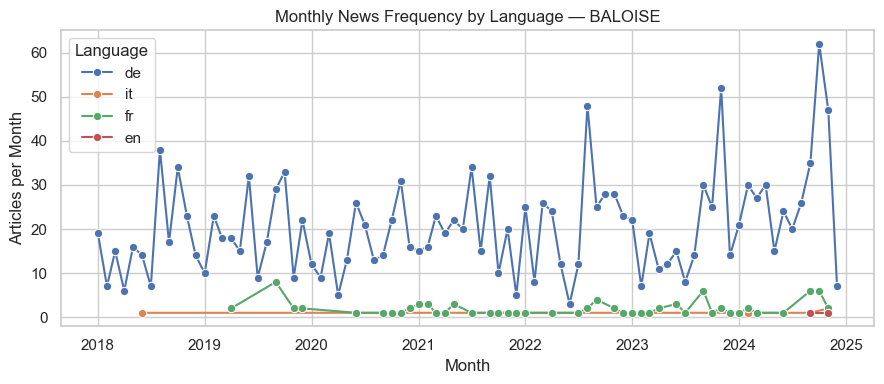

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


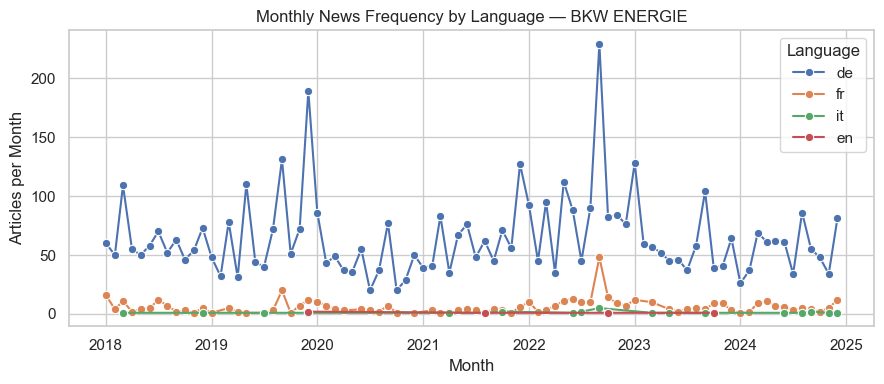

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


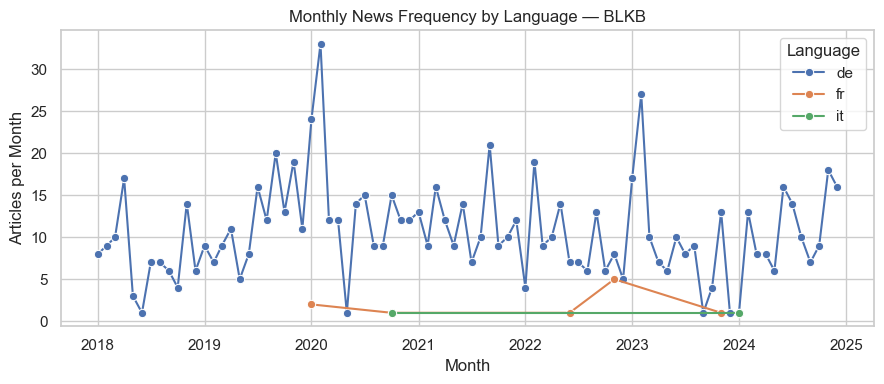

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


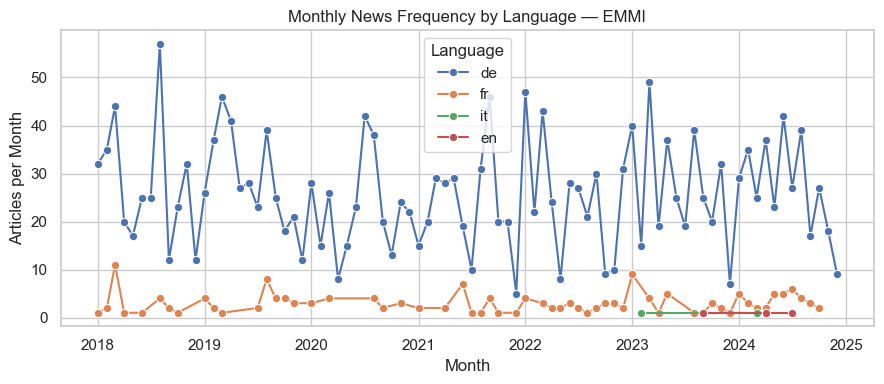

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


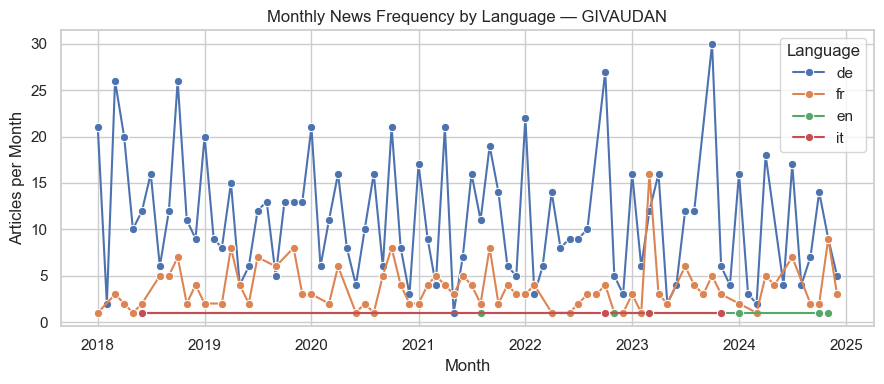

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


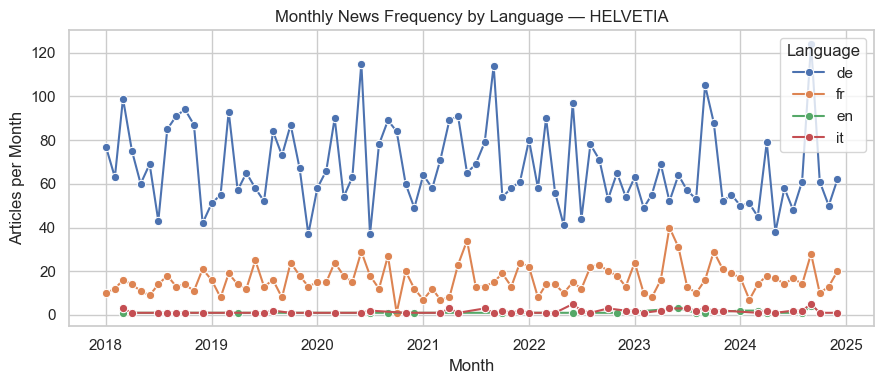

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


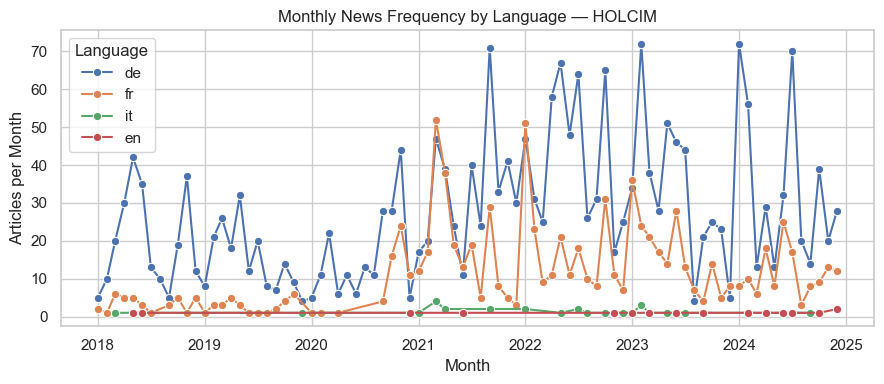

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


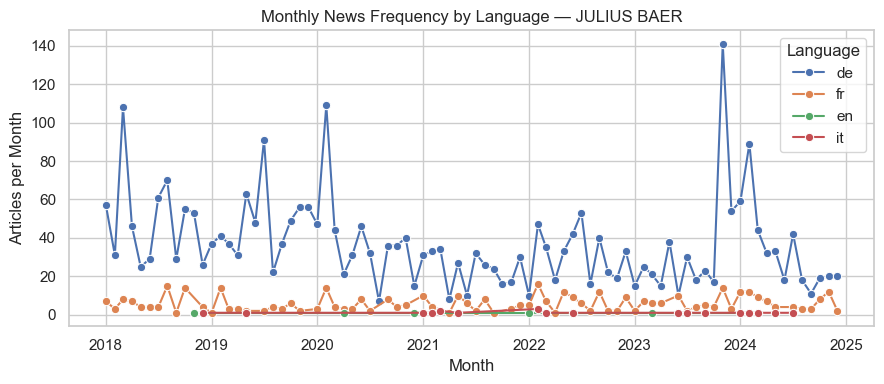

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


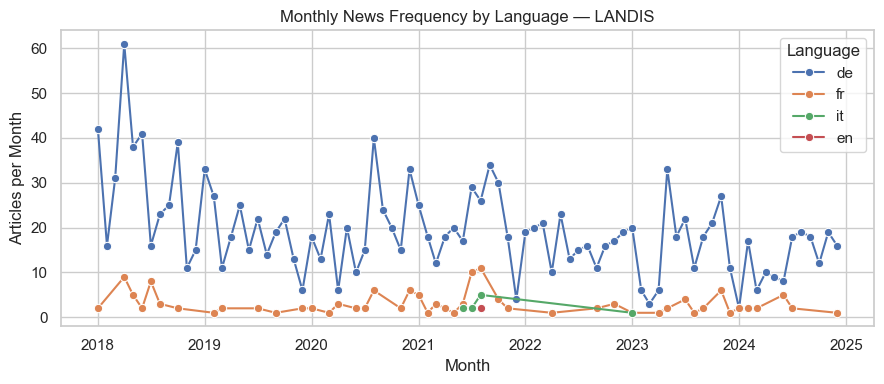

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


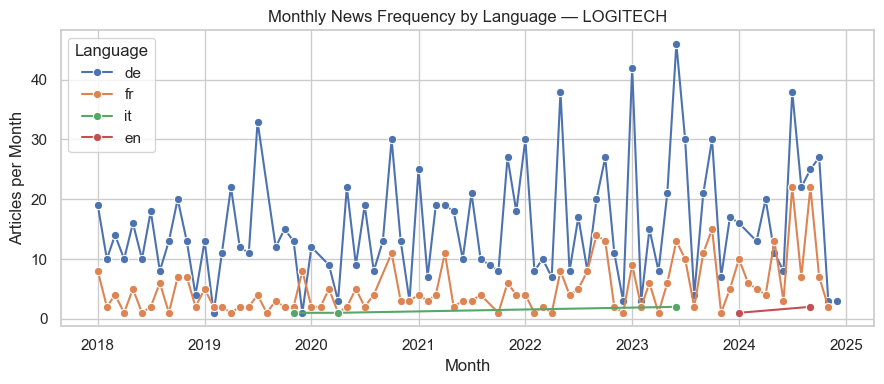

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


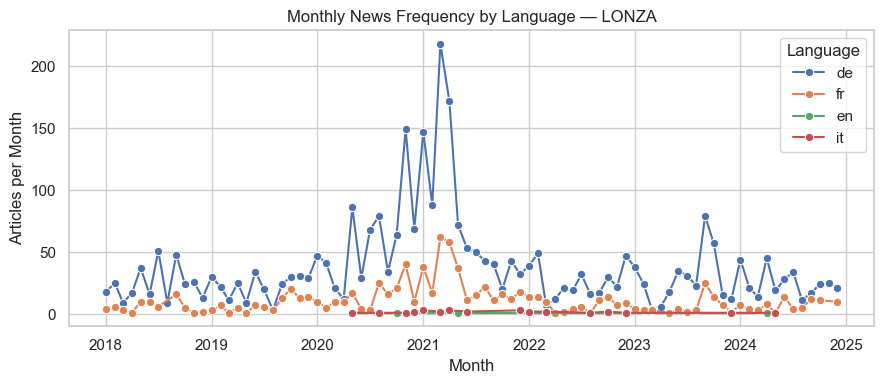

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


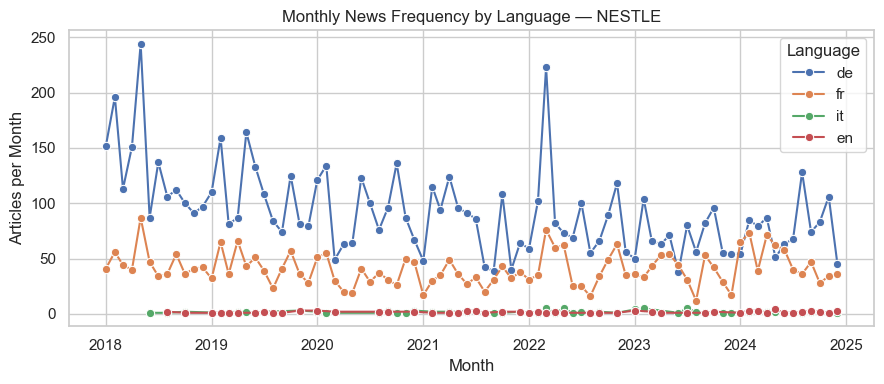

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


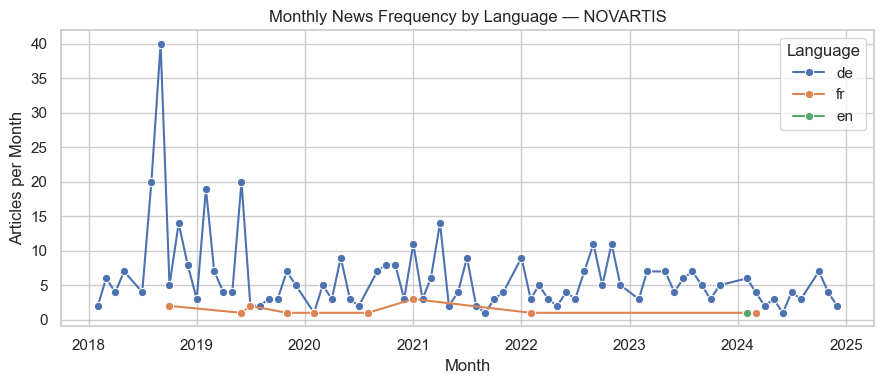

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


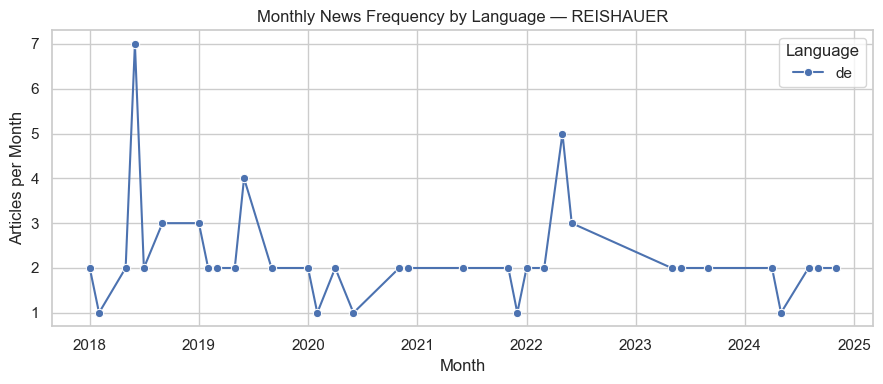

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


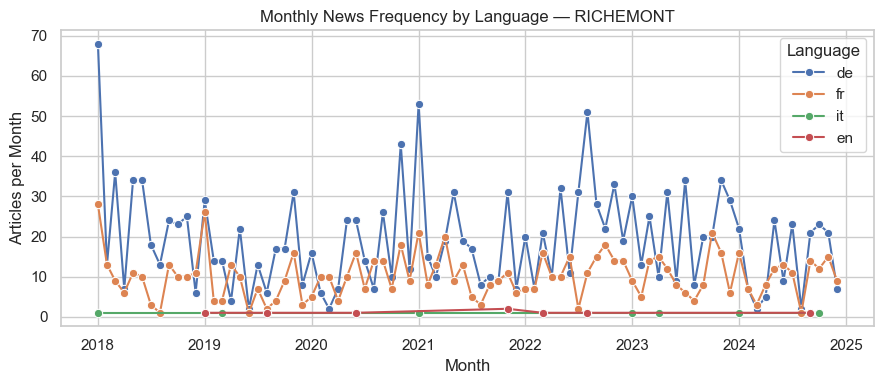

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


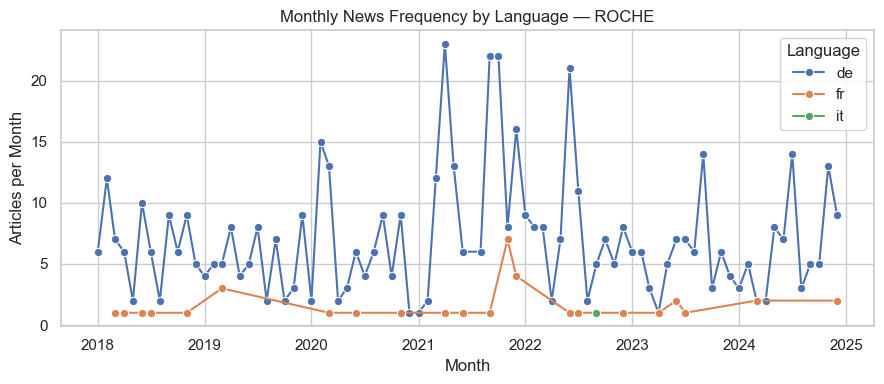

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


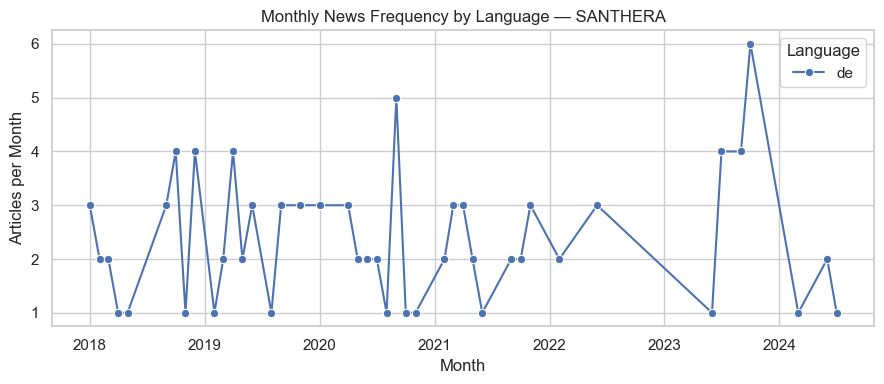

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


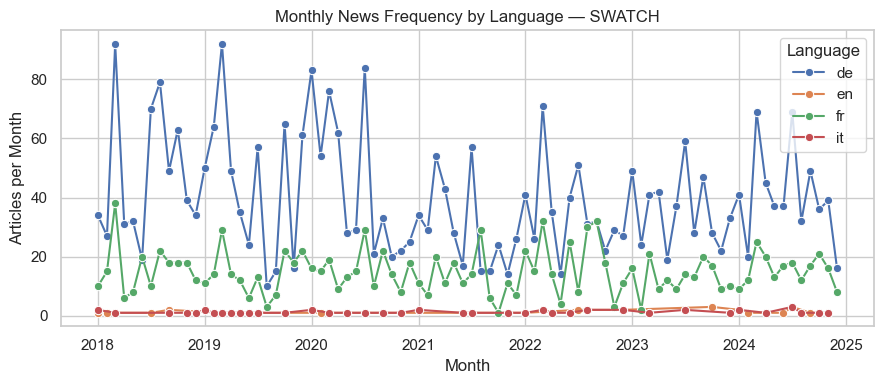

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


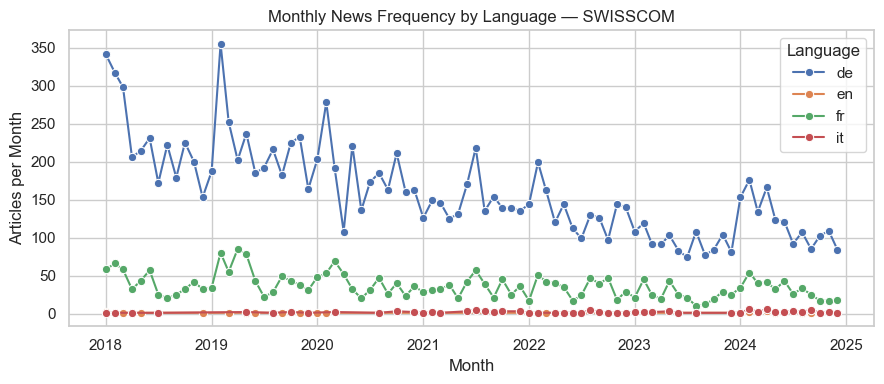

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


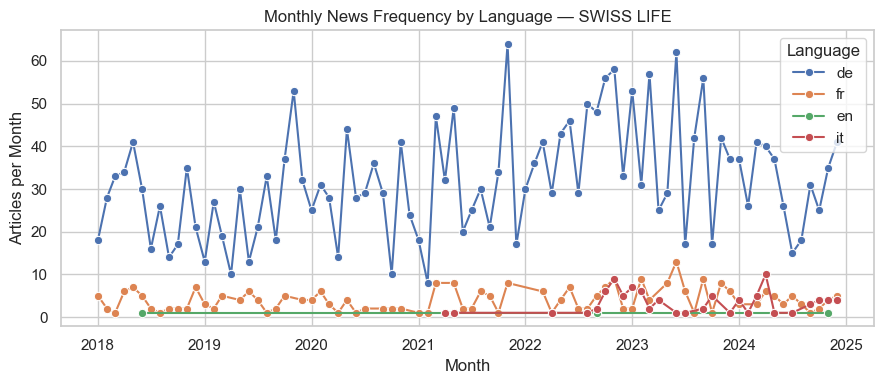

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


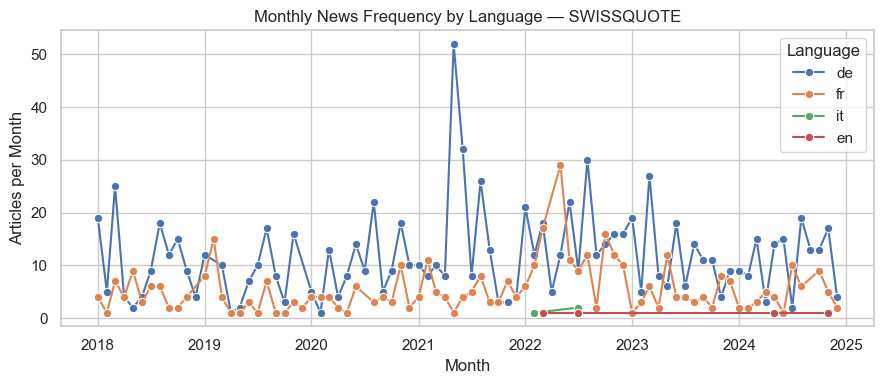

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


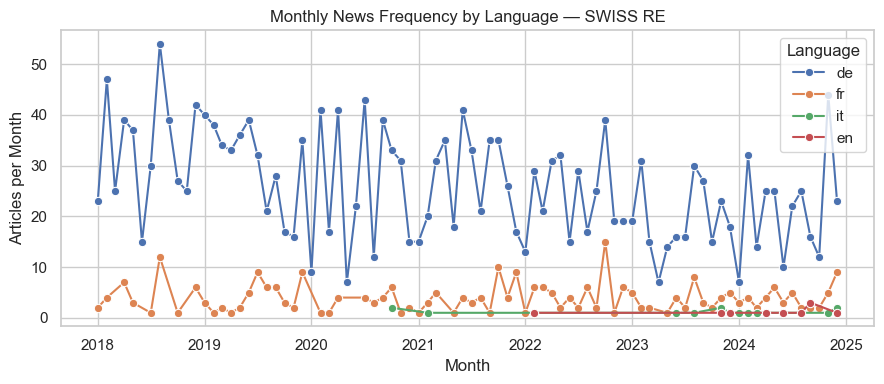

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


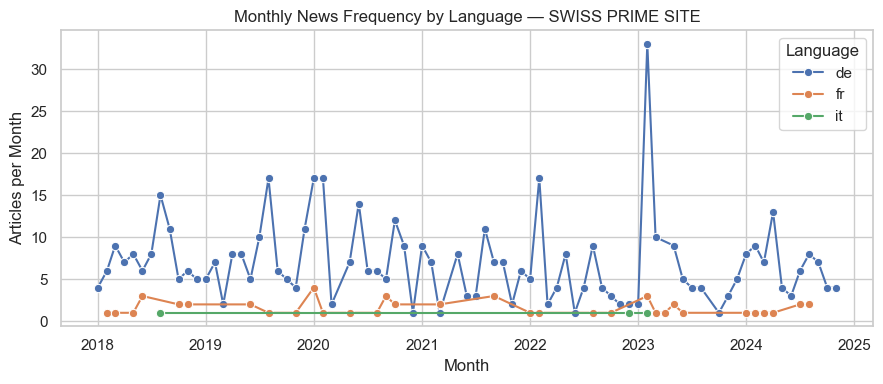

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


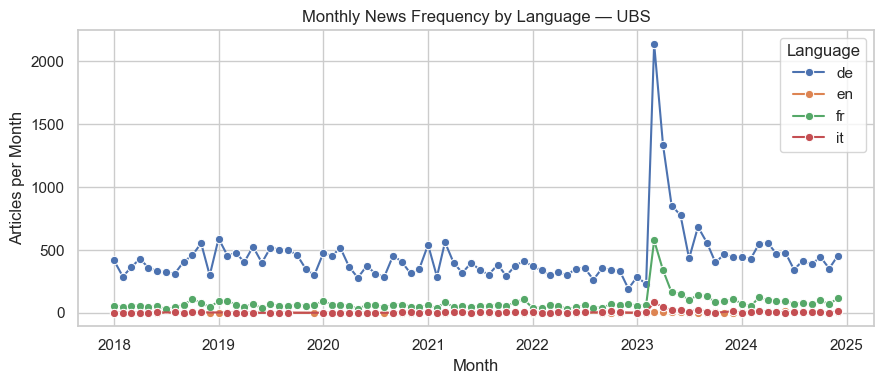

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


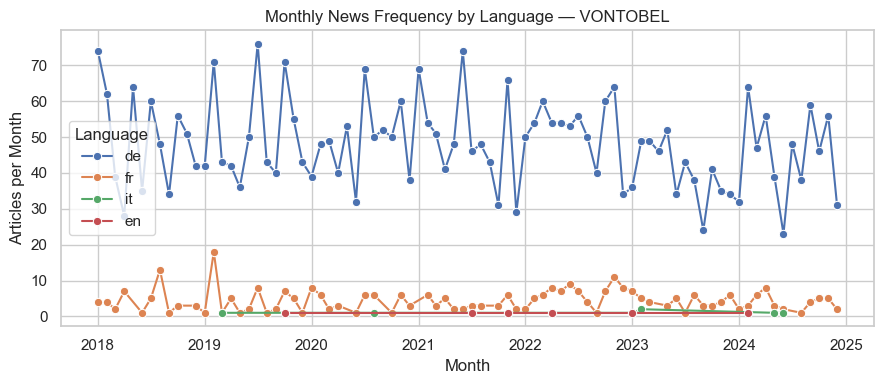

C:\Users\mkcak\AppData\Local\Temp\ipykernel_36484\3893663110.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()


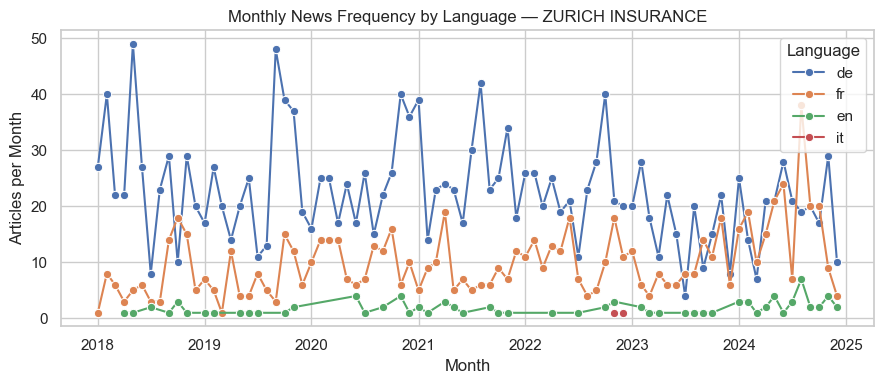

In [97]:
companies = df['company'].unique()

for comp in companies:
    subset = df[df['company'] == comp].copy()
    subset['month'] = subset['pubtime'].dt.to_period('M').dt.to_timestamp()
    monthly_lang = subset.groupby(['month', 'language']).size().reset_index(name='count')

    plt.figure(figsize=(9,4))
    sns.lineplot(data=monthly_lang, x='month', y='count', hue='language', marker='o')
    plt.title(f"Monthly News Frequency by Language — {comp.upper()}")
    plt.xlabel("Month")
    plt.ylabel("Articles per Month")
    plt.legend(title="Language")
    plt.tight_layout()
    plt.savefig(f"../../figures/news_exploration/monthly_news_frequency_by_language_{comp}.png")
    plt.show()


In [98]:
# Ensure 'pubtime' is datetime
df['pubtime'] = pd.to_datetime(df['pubtime'])

# Extract year from pubtime
df['year'] = df['pubtime'].dt.year

# Group by company, year, language
lang_year = (
    df.groupby(['company', 'year', 'language'])
      .size()
      .reset_index(name='count')
)


In [99]:
lang_year['proportion'] = (
    lang_year.groupby(['company', 'year'])['count']
             .transform(lambda x: x / x.sum())
)


In [100]:
# Create pivot: rows = company, columns = year, values = proportion of 'de'
lang = 'de'
pivot = lang_year[lang_year['language'] == lang].pivot(
    index='company', columns='year', values='proportion'
).fillna(0)


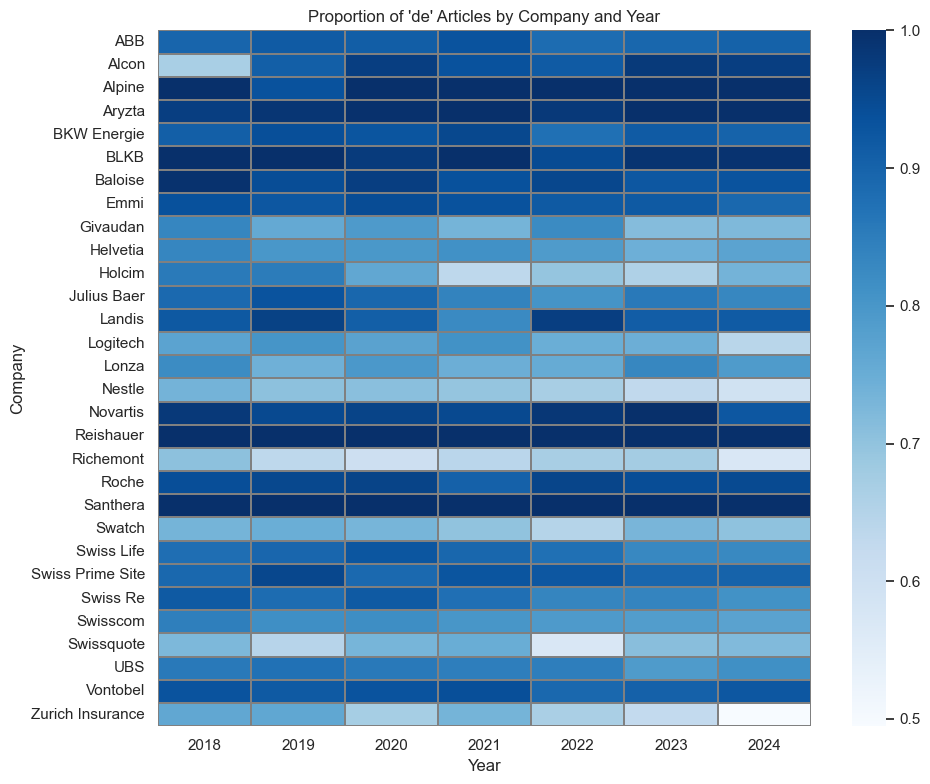

In [101]:
plt.figure(figsize=(10,8))
sns.heatmap(pivot, cmap='Blues', linewidths=0.3, linecolor='gray')
plt.title(f"Proportion of '{lang}' Articles by Company and Year")
plt.xlabel("Year")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


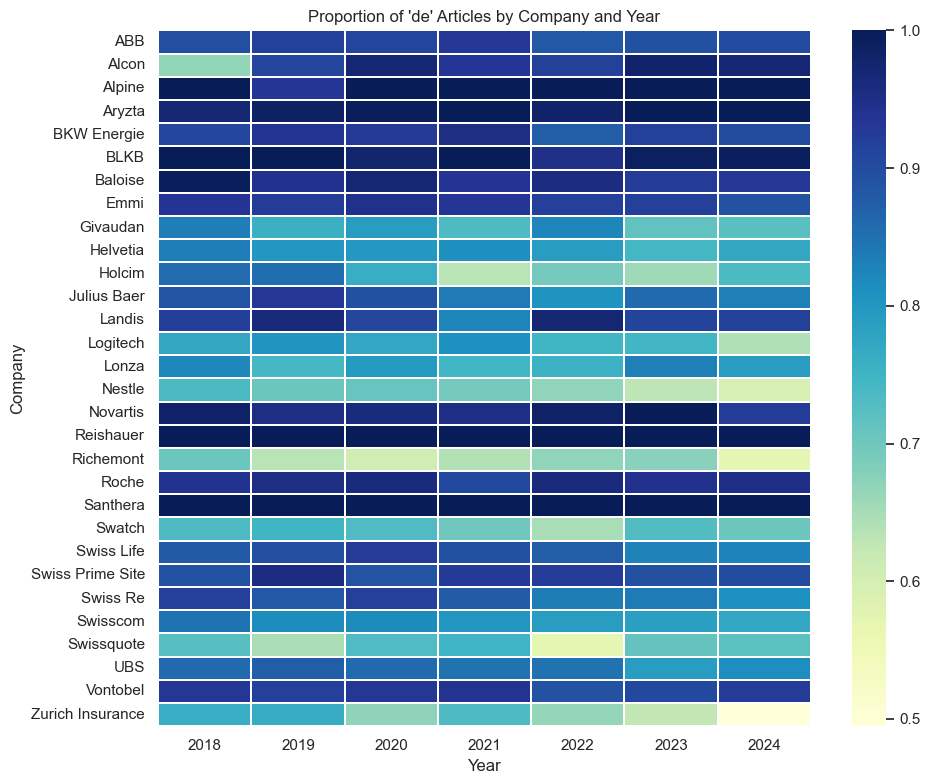

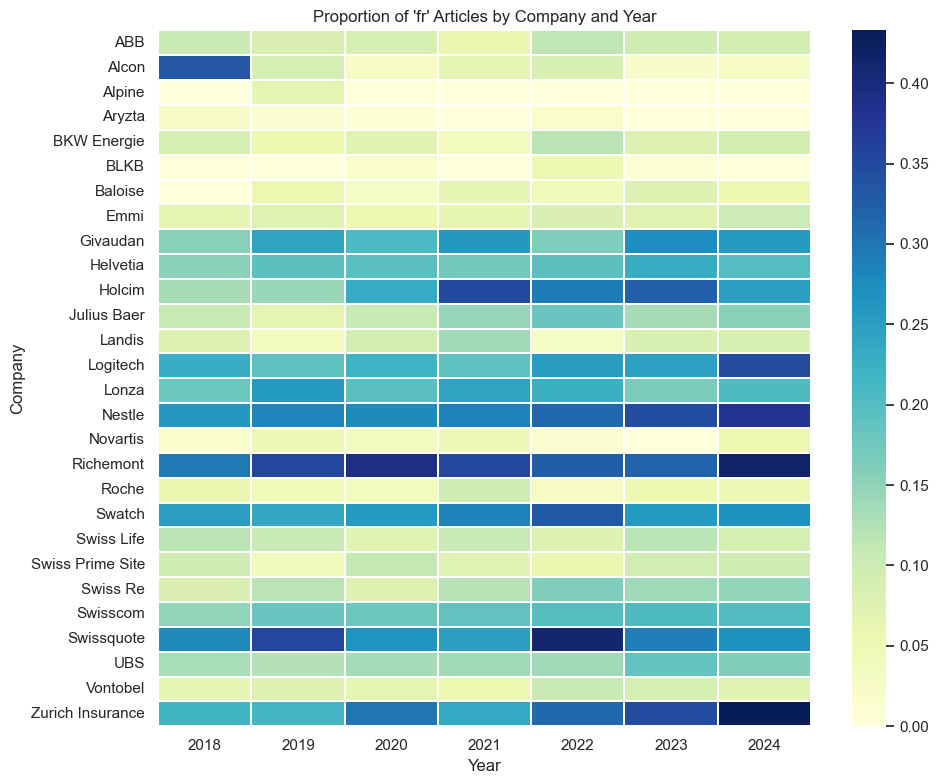

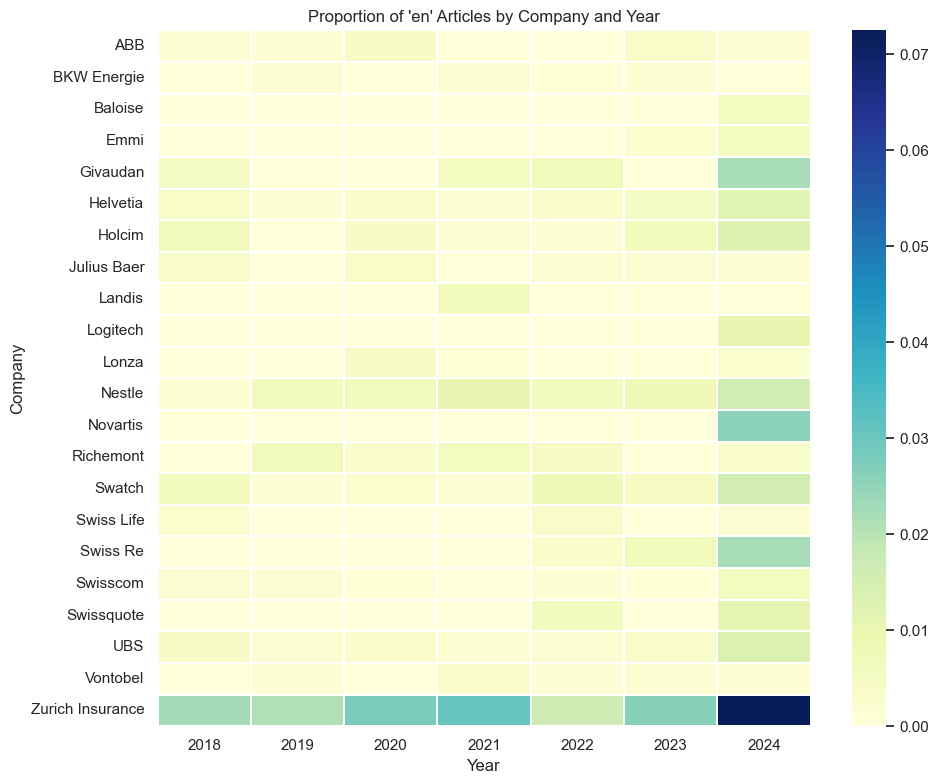

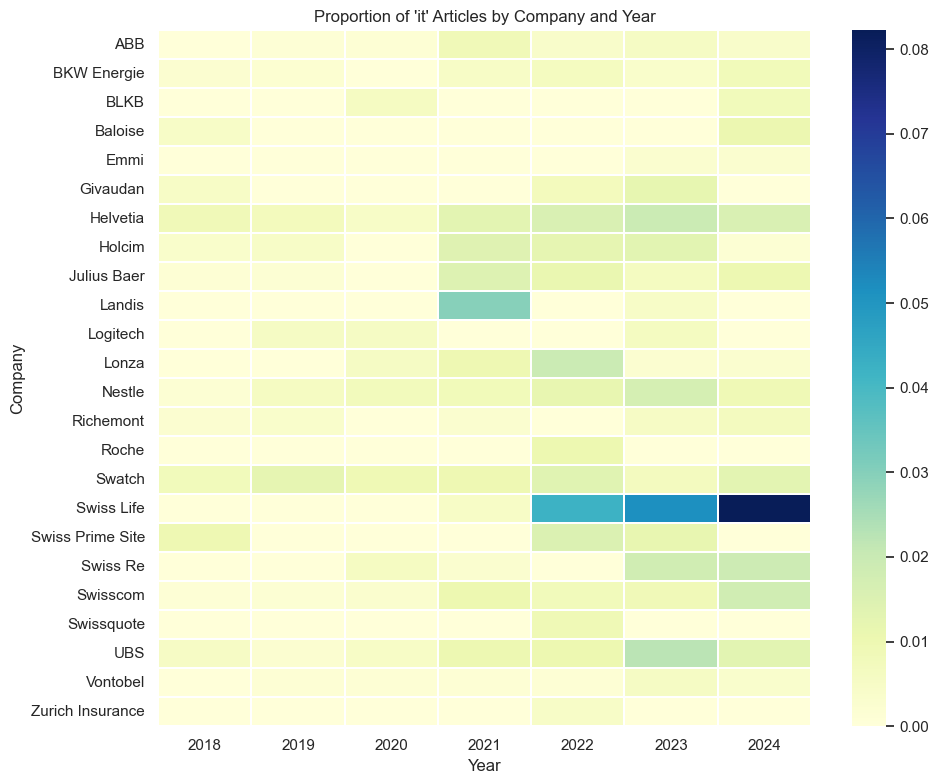

In [102]:
for lang in ['de', 'fr', 'en', 'it']:
    pivot = lang_year[lang_year['language'] == lang].pivot(
        index='company', columns='year', values='proportion'
    ).fillna(0)
    plt.figure(figsize=(10,8))
    sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.3)
    plt.title(f"Proportion of '{lang}' Articles by Company and Year")
    plt.xlabel("Year")
    plt.ylabel("Company")
    plt.tight_layout()
    plt.show()


In [103]:
## Finish